In [1]:
import pandas as pd
import numpy as np
#import matplotlib as plt
%config InlineBackend.figure_format ='retina' #This makes your plot clearer

In [2]:

url = 'https://github.com/hirenbagga/mta-lost-found/blob/e13f2c9283add4732b9a04be1cf2e8b06e2e1f77/data/all-data.csv?raw=true'
df = pd.read_csv(url,index_col=0)
df.tail(5)

,Accessories.All.Other.Accessories,Accessories.Belt,Accessories.Gloves,Accessories.Hat,Accessories.Make.up,Accessories.Scarf,Accessories.Ties,Accessories.Umbrella,Book.Address.book,Book.Diary,...,Wallet.Purse.Handbag,Wallet.Purse.ID.Holder,Wallet.Purse.Lanyard,Wallet.Purse.Pouch,Wallet.Purse.Purse,Wallet.Purse.Wallet,Wallet.Purse.Wristlet,date,Electronics.Activity.Tracker,Electronics.Body.Activity.Tracker
247,1167,234,3182,3546,1667,1872,250,2727,666,472,...,499,6799,53,2418,9871,34606,1546,2015-11-30,0,19
248,1167,235,3182,3548,1668,1873,250,2727,666,472,...,501,6800,53,2420,9881,34629,1546,2015-12-01,0,19
249,1167,235,3182,3548,1668,1873,251,2727,666,472,...,501,6800,53,2420,9884,34634,1547,2015-12-02,0,19
250,1167,236,3183,3549,1669,1873,251,2728,666,472,...,501,6802,53,2420,9891,34654,1548,2015-12-03,0,20
251,1167,237,3185,3551,1670,1873,252,2731,666,473,...,501,6806,53,2423,9896,34699,1548,2015-12-04,0,20


In [3]:
ident_cols = [col for col in df.columns if 'identifi' in col]
print(list(df.columns))
print(ident_cols)

['Accessories.All.Other.Accessories', 'Accessories.Belt', 'Accessories.Gloves', 'Accessories.Hat', 'Accessories.Make.up', 'Accessories.Scarf', 'Accessories.Ties', 'Accessories.Umbrella', 'Book.Address.book', 'Book.Diary', 'Book.Hard.Cover', 'Book.Other', 'Book.Paperback', 'Book.Photo.album', 'Book.Soft.cover', 'Carry.Bag...Luggage.All.other.baggage', 'Carry.Bag...Luggage.Backpack', 'Carry.Bag...Luggage.Briefcase', 'Carry.Bag...Luggage.Duffle.bag', 'Carry.Bag...Luggage.Garment.suit.bag', 'Carry.Bag...Luggage.Handbag', 'Carry.Bag...Luggage.Messenger.bag', 'Carry.Bag...Luggage.Shopping.bag', 'Carry.Bag...Luggage.Shoulder.bag', 'Carry.Bag...Luggage.Suitcase', 'Carry.Bag...Luggage.Tote.bag', 'Cell.Phone.Telephone.Communication.Device.Answering.Machine', 'Cell.Phone.Telephone.Communication.Device.Cell.phone.', 'Cell.Phone.Telephone.Communication.Device.Other', 'Cell.Phone.Telephone.Communication.Device.Pager', 'Cell.Phone.Telephone.Communication.Device.Telephone.Accessories', 'Cell.Phone.Tel

In [109]:
['Identification.AAA.Card'], ['Identification.All.Other.Personal.Identification'], ['Identification.Badge'], ['Identification.Benefit.Card'], ['Identification.Birth.Certificate'], ['Identification.Credit.Card'], ['Identification.Death.Certificate'], ['Identification.Debit.Card'], ['Identification.Drivers.License'], ['Identification.Employment.ID'], ['Identification.Identification.Card'], ['Identification.Insurance.Card'], ['Identification.Library.card'], ['Identification.Membership.card'], ['Identification.Military.ID'], ['Identification.Passport'], ['Identification.Registration.Card'], ['Identification.Resident.Card'], ['Identification.School.ID'], ['Identification.Social.Security.Card']

(['Identification.AAA.Card'],
 ['Identification.All.Other.Personal.Identification'],
 ['Identification.Badge'],
 ['Identification.Benefit.Card'],
 ['Identification.Birth.Certificate'],
 ['Identification.Credit.Card'],
 ['Identification.Death.Certificate'],
 ['Identification.Debit.Card'],
 ['Identification.Drivers.License'],
 ['Identification.Employment.ID'],
 ['Identification.Identification.Card'],
 ['Identification.Insurance.Card'],
 ['Identification.Library.card'],
 ['Identification.Membership.card'],
 ['Identification.Military.ID'],
 ['Identification.Passport'],
 ['Identification.Registration.Card'],
 ['Identification.Resident.Card'],
 ['Identification.School.ID'],
 ['Identification.Social.Security.Card'])

In [5]:
df["Identification.Total"] = df['Identification.AAA.Card'] + df['Identification.All.Other.Personal.Identification'] + df['Identification.Badge'] + df['Identification.Benefit.Card'] + df['Identification.Birth.Certificate'] + df['Identification.Credit.Card'] + df['Identification.Death.Certificate'] + df['Identification.Debit.Card'] + df['Identification.Drivers.License'] + df['Identification.Employment.ID'] + df['Identification.Identification.Card'] + df['Identification.Insurance.Card'] + df['Identification.Library.card'] + df['Identification.Membership.card'] + df['Identification.Military.ID'] + df['Identification.Passport'] + df['Identification.Registration.Card'] + df['Identification.Resident.Card'] + df['Identification.School.ID'] + df['Identification.Social.Security.Card']
df["Identification.Total"]

1      115288
2      115288
3      115374
4      115537
5      115635
        ...  
247    150251
248    150366
249    150401
250    150519
251    150722
Name: Identification.Total, Length: 251, dtype: int64

In [6]:
df["Identification.Returnable"] = df['Identification.AAA.Card'] + df['Identification.Benefit.Card'] + df['Identification.Birth.Certificate'] + df['Identification.Credit.Card'] + df['Identification.Death.Certificate'] + df['Identification.Debit.Card'] + df['Identification.Drivers.License'] + df['Identification.Identification.Card'] + df['Identification.Insurance.Card'] + df['Identification.Military.ID'] + df['Identification.Passport'] + df['Identification.Resident.Card'] + df['Identification.Social.Security.Card']
df["Identification.Returnable"]

1       80158
2       80158
3       80221
4       80344
5       80419
        ...  
247    105970
248    106057
249    106086
250    106181
251    106330
Name: Identification.Returnable, Length: 251, dtype: int64

In [7]:
import matplotlib as plt
%config InlineBackend.figure_format ='retina'
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd

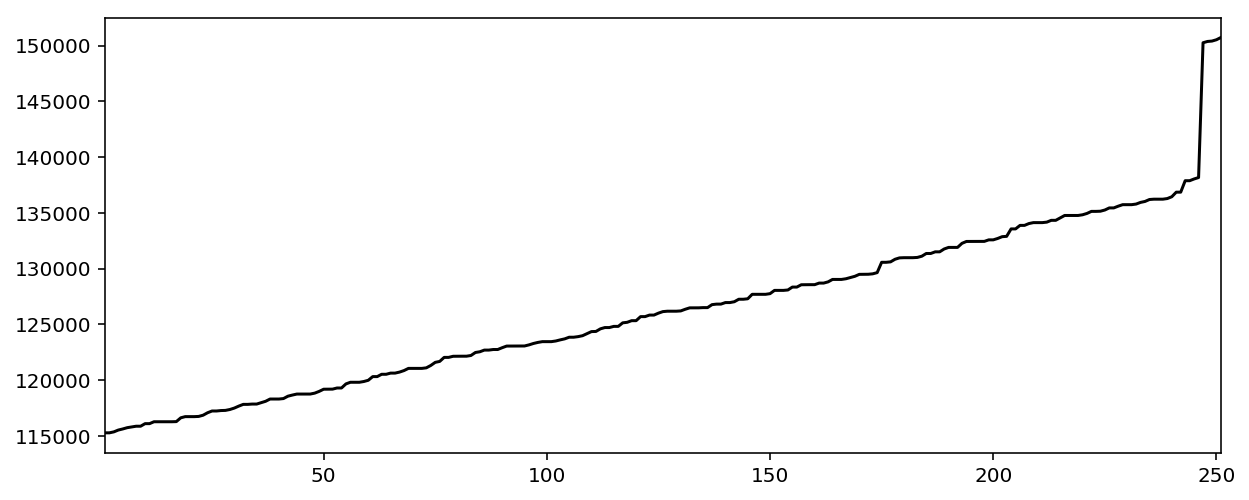

In [8]:
IdentTotPlot = df["Identification.Total"].plot(kind='line',figsize=(10,4), color ="black")
IdentTotPlot

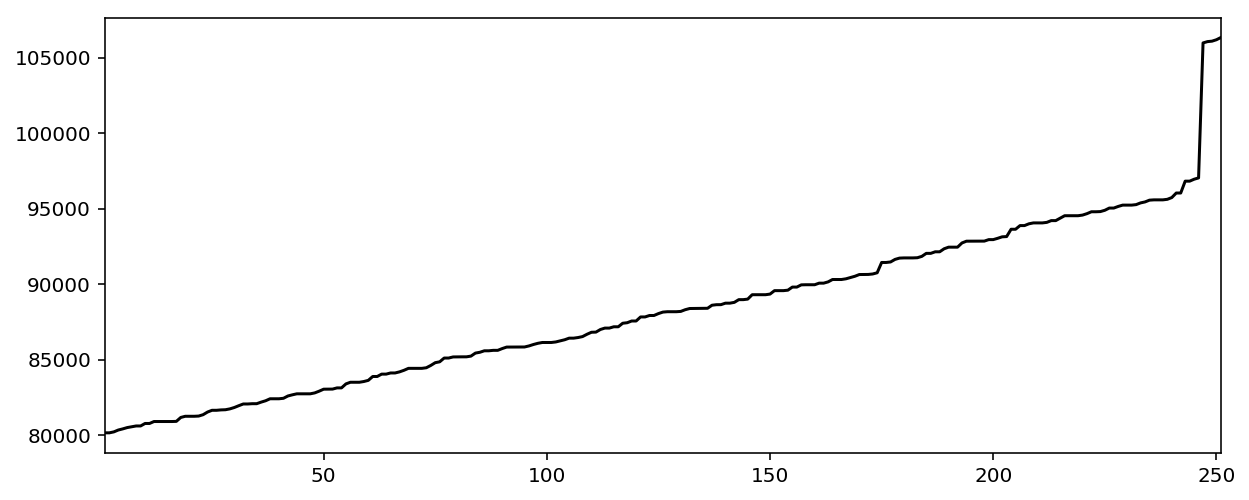

In [9]:
IdentReturnPlot = df["Identification.Returnable"].plot(kind='line',figsize=(10,4), color ="black")

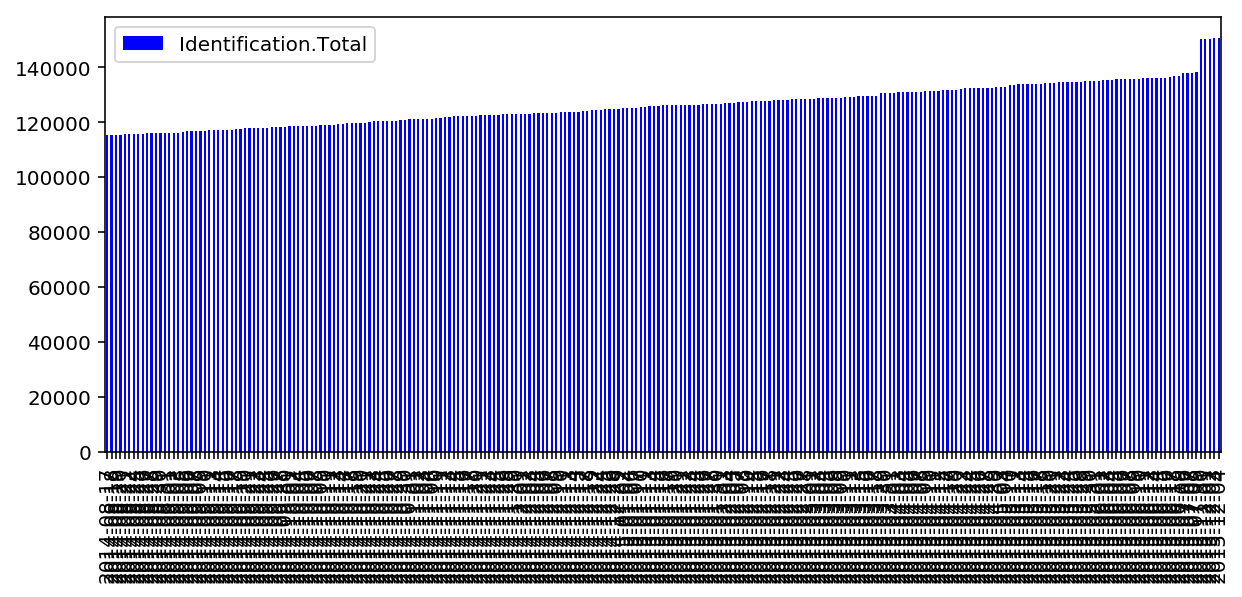

In [10]:

IdentDated = df[['Identification.Total','Identification.Returnable','date']]
IdentPlotDated = IdentDated[['Identification.Total','date']].plot(kind='bar',figsize=(10,4), color ="blue" )
IdentPlotDated.set_xticklabels(IdentDated['date']);

In [11]:
#date_form = DateFormatter("%Y-%m-%d")
#IdentPlotDated.xaxis.set_major_formatter(date_form)


In [12]:
all_dates = pd.date_range(start='2014-08-17', end='2015-12-04')
all_dates

DatetimeIndex(['2014-08-17', '2014-08-18', '2014-08-19', '2014-08-20',
               '2014-08-21', '2014-08-22', '2014-08-23', '2014-08-24',
               '2014-08-25', '2014-08-26',
               ...
               '2015-11-25', '2015-11-26', '2015-11-27', '2015-11-28',
               '2015-11-29', '2015-11-30', '2015-12-01', '2015-12-02',
               '2015-12-03', '2015-12-04'],
              dtype='datetime64[ns]', length=475, freq='D')

In [13]:
df.set_index(pd.to_datetime(df['date']), inplace=True)
df.tail(5)

,Accessories.All.Other.Accessories,Accessories.Belt,Accessories.Gloves,Accessories.Hat,Accessories.Make.up,Accessories.Scarf,Accessories.Ties,Accessories.Umbrella,Book.Address.book,Book.Diary,...,Wallet.Purse.Lanyard,Wallet.Purse.Pouch,Wallet.Purse.Purse,Wallet.Purse.Wallet,Wallet.Purse.Wristlet,date,Electronics.Activity.Tracker,Electronics.Body.Activity.Tracker,Identification.Total,Identification.Returnable
date,,,,,,,,,,,,,,,,,,,,,
2015-11-30,1167,234,3182,3546,1667,1872,250,2727,666,472,...,53,2418,9871,34606,1546,2015-11-30,0,19,150251,105970
2015-12-01,1167,235,3182,3548,1668,1873,250,2727,666,472,...,53,2420,9881,34629,1546,2015-12-01,0,19,150366,106057
2015-12-02,1167,235,3182,3548,1668,1873,251,2727,666,472,...,53,2420,9884,34634,1547,2015-12-02,0,19,150401,106086
2015-12-03,1167,236,3183,3549,1669,1873,251,2728,666,472,...,53,2420,9891,34654,1548,2015-12-03,0,20,150519,106181
2015-12-04,1167,237,3185,3551,1670,1873,252,2731,666,473,...,53,2423,9896,34699,1548,2015-12-04,0,20,150722,106330


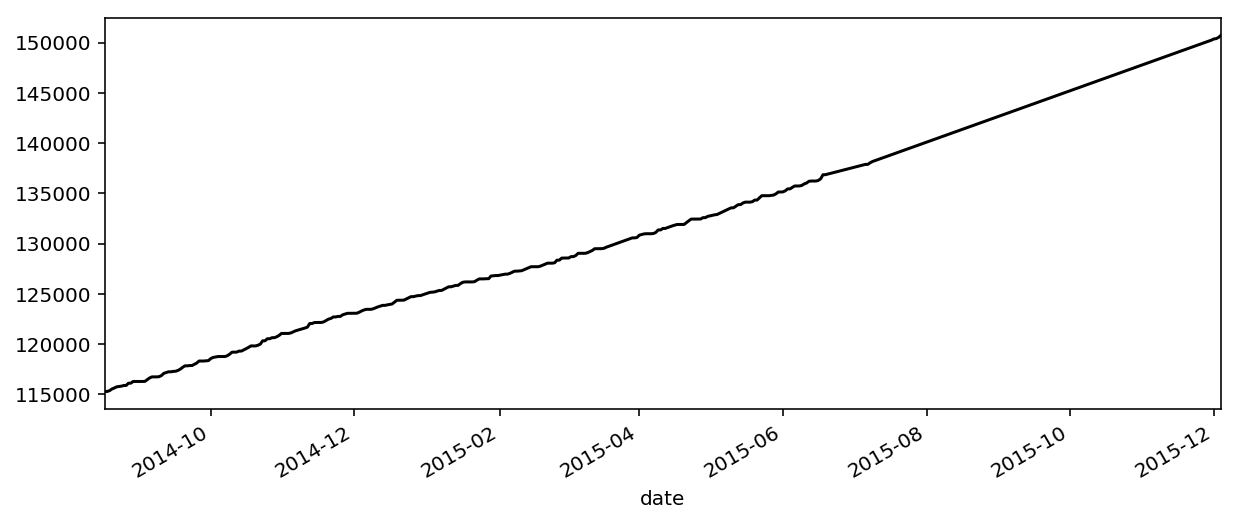

In [14]:
IdentTotPlot = df["Identification.Total"].plot(kind='line',figsize=(10,4), color ="black")
IdentTotPlot

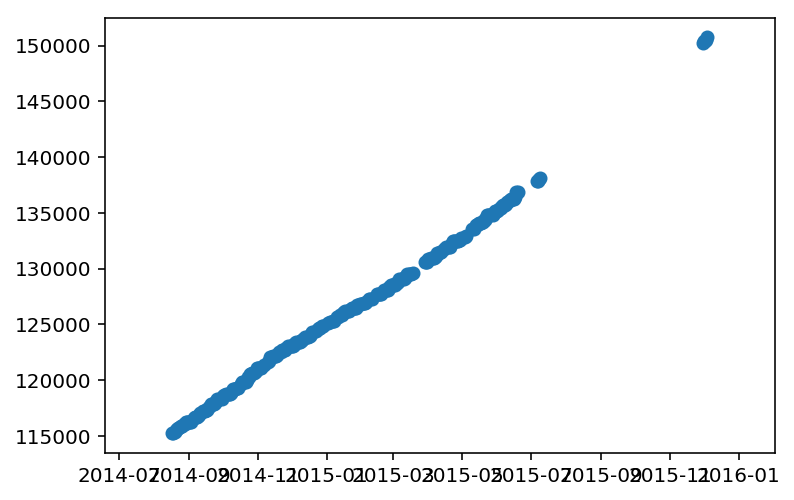

In [15]:
plt.scatter(df.index, df['Identification.Total'])

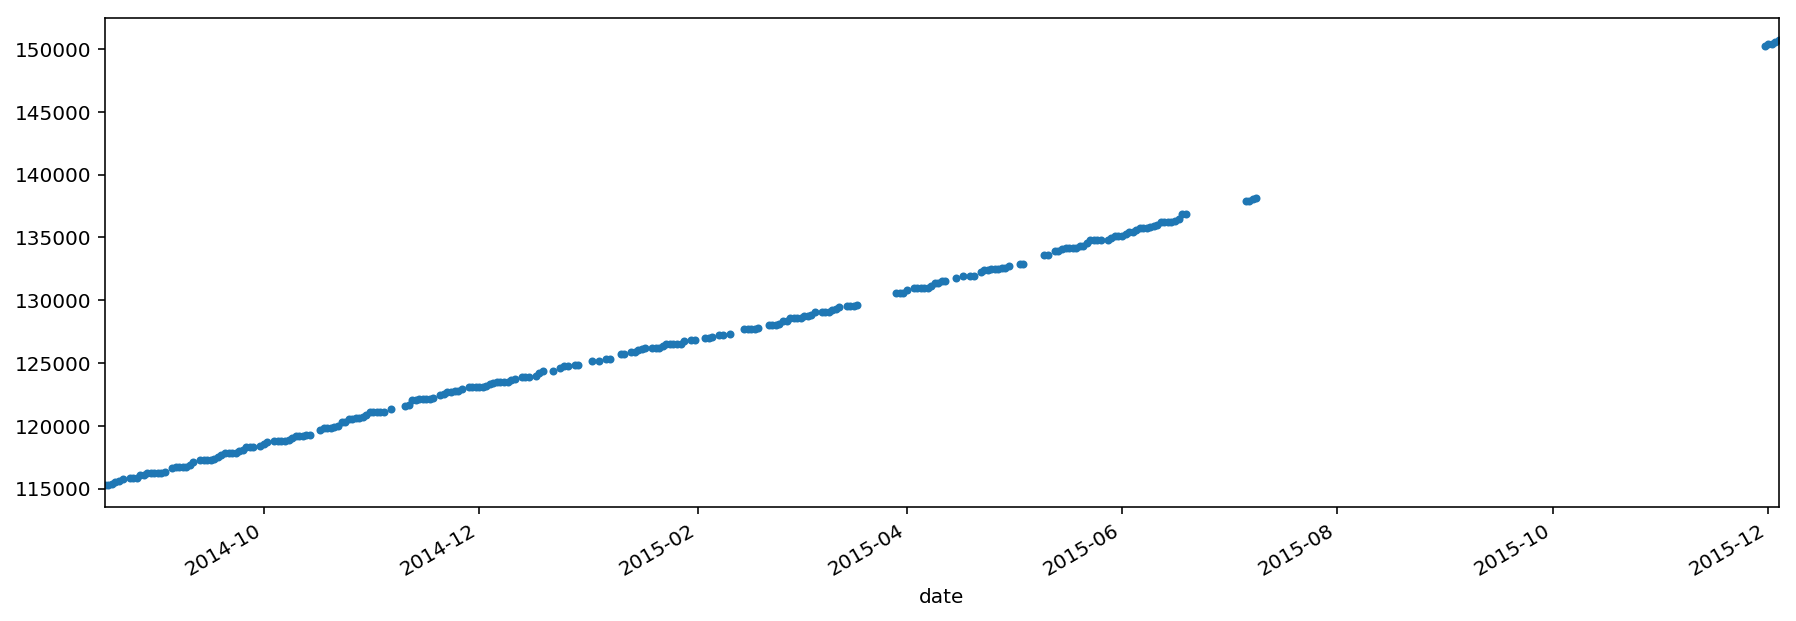

In [16]:
df['Identification.Total'].plot(style=".",figsize=(15,5))

In [17]:
df['Date'] = pd.to_datetime(df['date'])

In [18]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

In [19]:
X=df['DateInt'].values
Y=df['Identification.Total'].values

In [20]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [21]:
Y_pred = lin_reg(X,Y)

0.08067001116484246 -1020687.3150430572


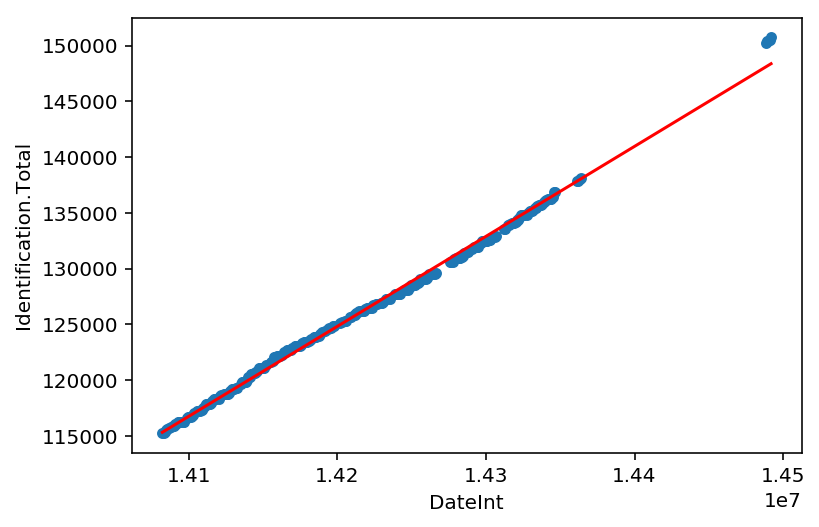

In [22]:
df.plot.scatter(x='DateInt', y='Identification.Total')
plt.plot([min(df['DateInt'].values), max(df['DateInt'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()


In [23]:
#410,400

In [24]:
Y_pred.min()

115334.8873040058

In [25]:
Y_pred.max()

148372.16099641065

In [26]:
#33,038

In [27]:
(150722-115288)/475

74.59789473684211

In [28]:
#74.59789473684211 items per day

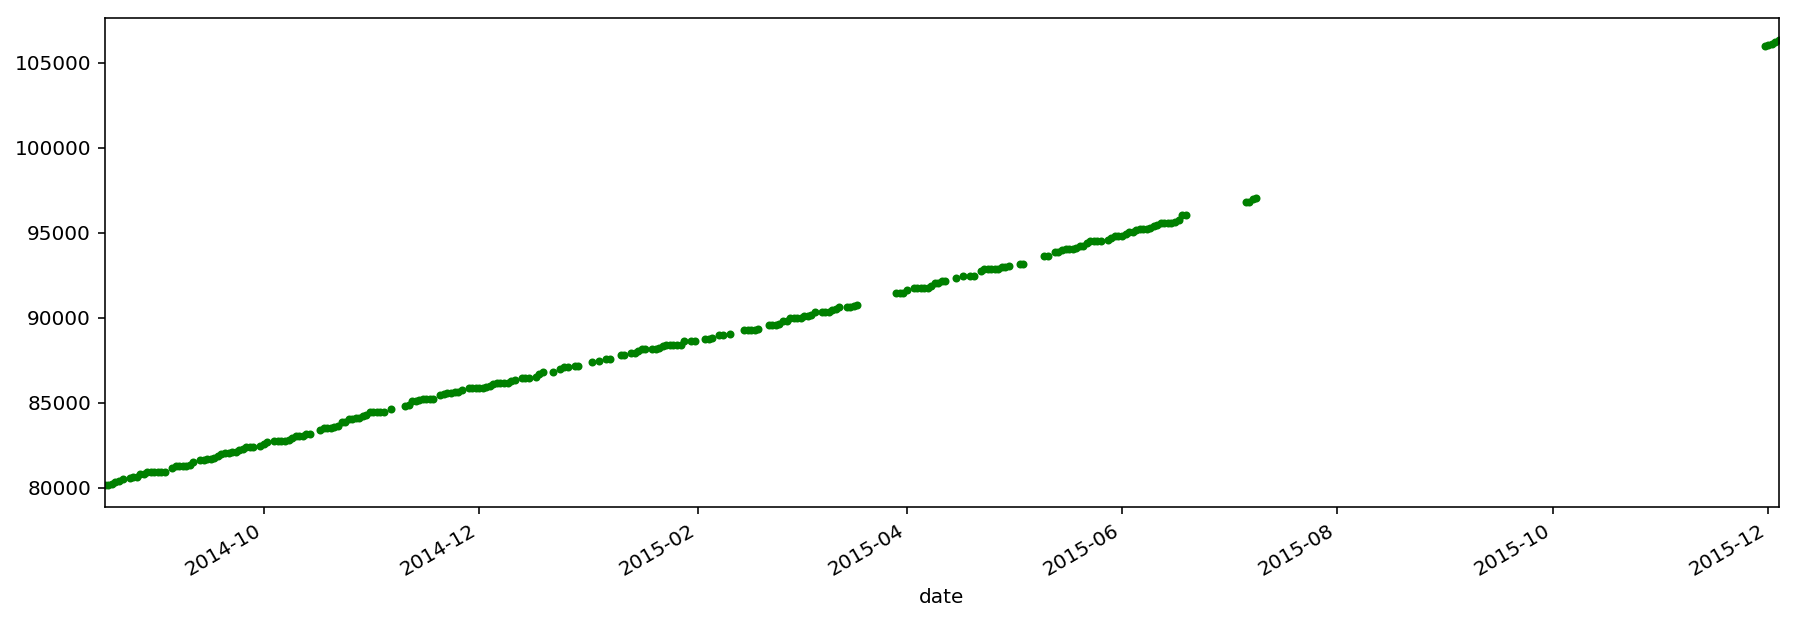

In [29]:
df['Identification.Returnable'].plot(style=".",figsize=(15,5), color="green")

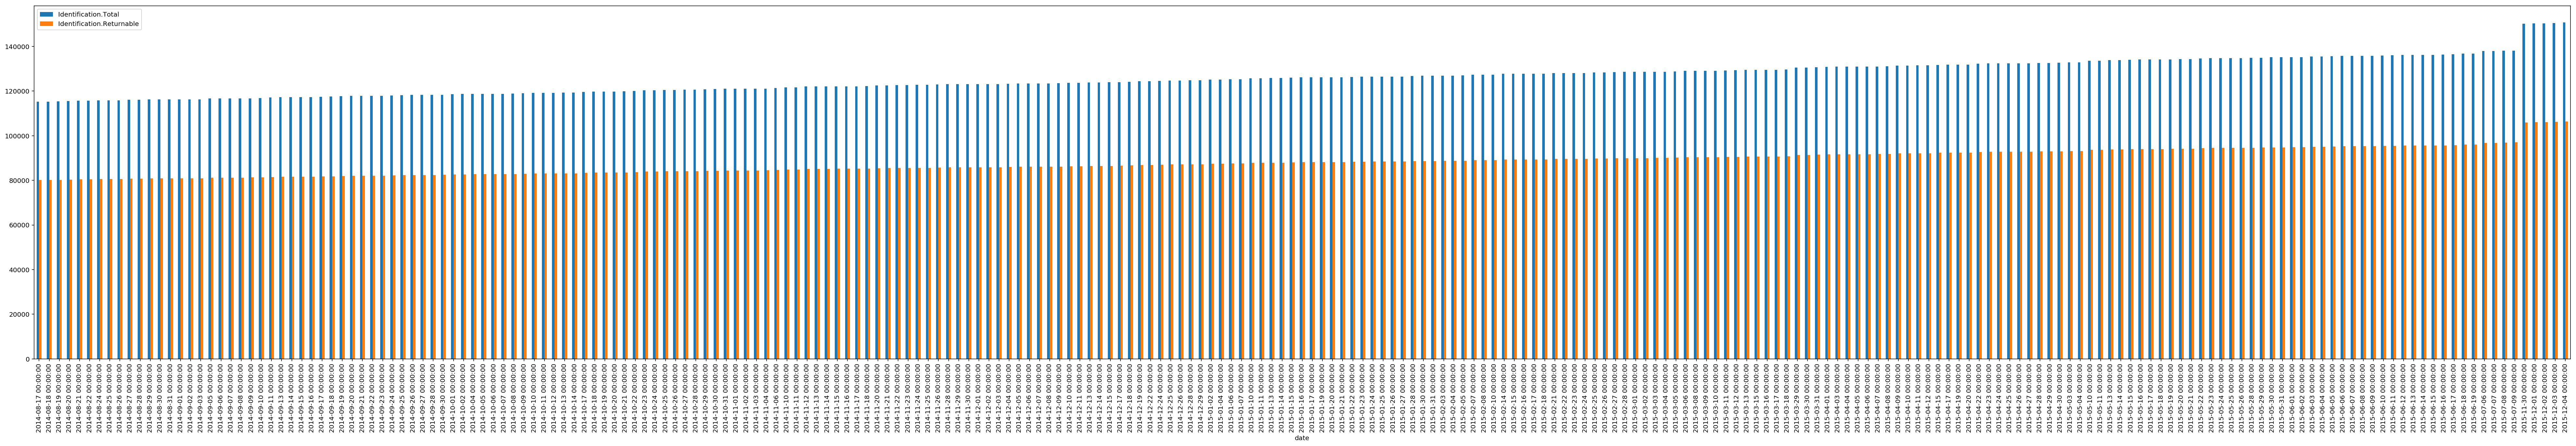

In [30]:
IdentPlotCompare = df[['Identification.Total','Identification.Returnable']].plot(kind='bar',figsize=(70,10))

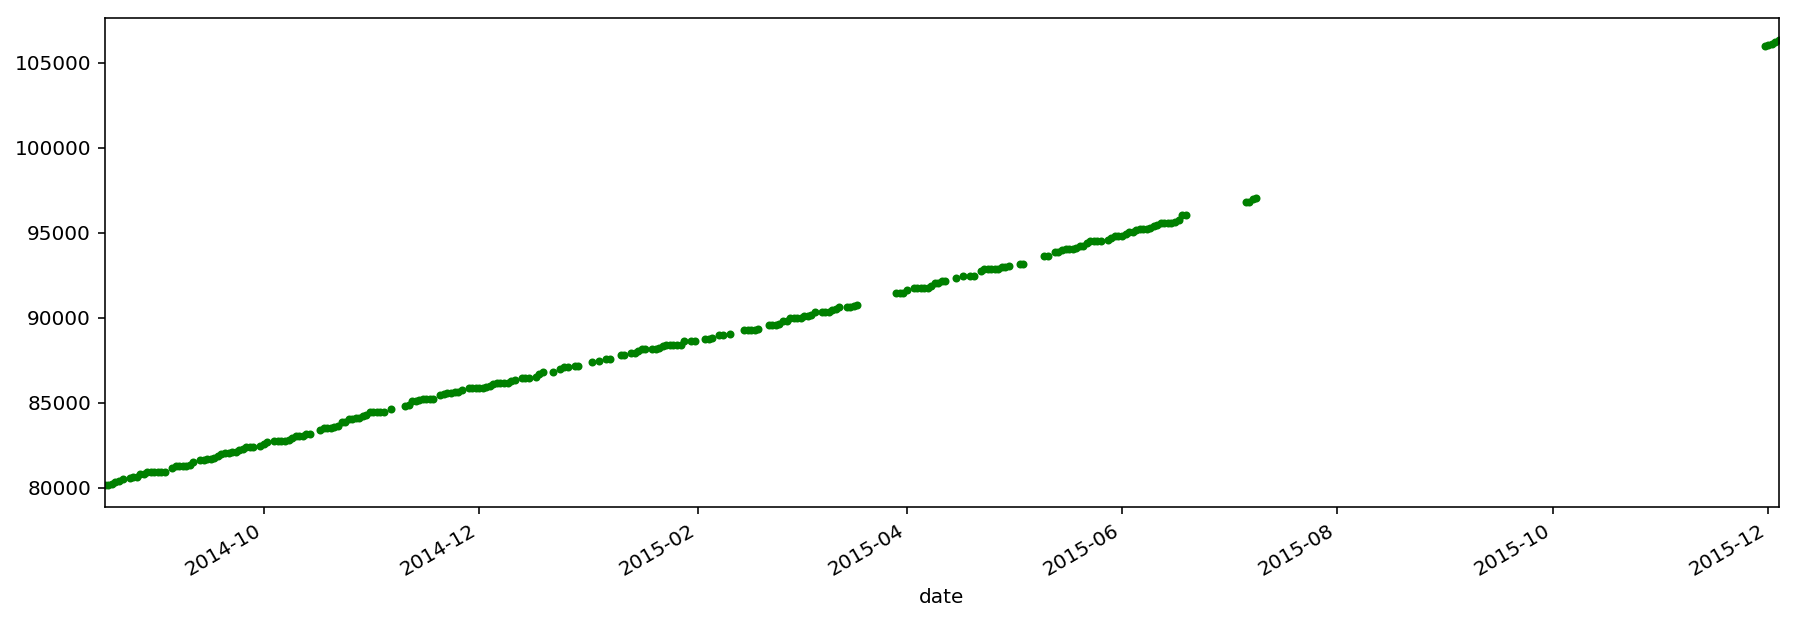

In [31]:
df['Identification.Returnable'].plot(style=".",figsize=(15,5), color="green")

(0, 160000)

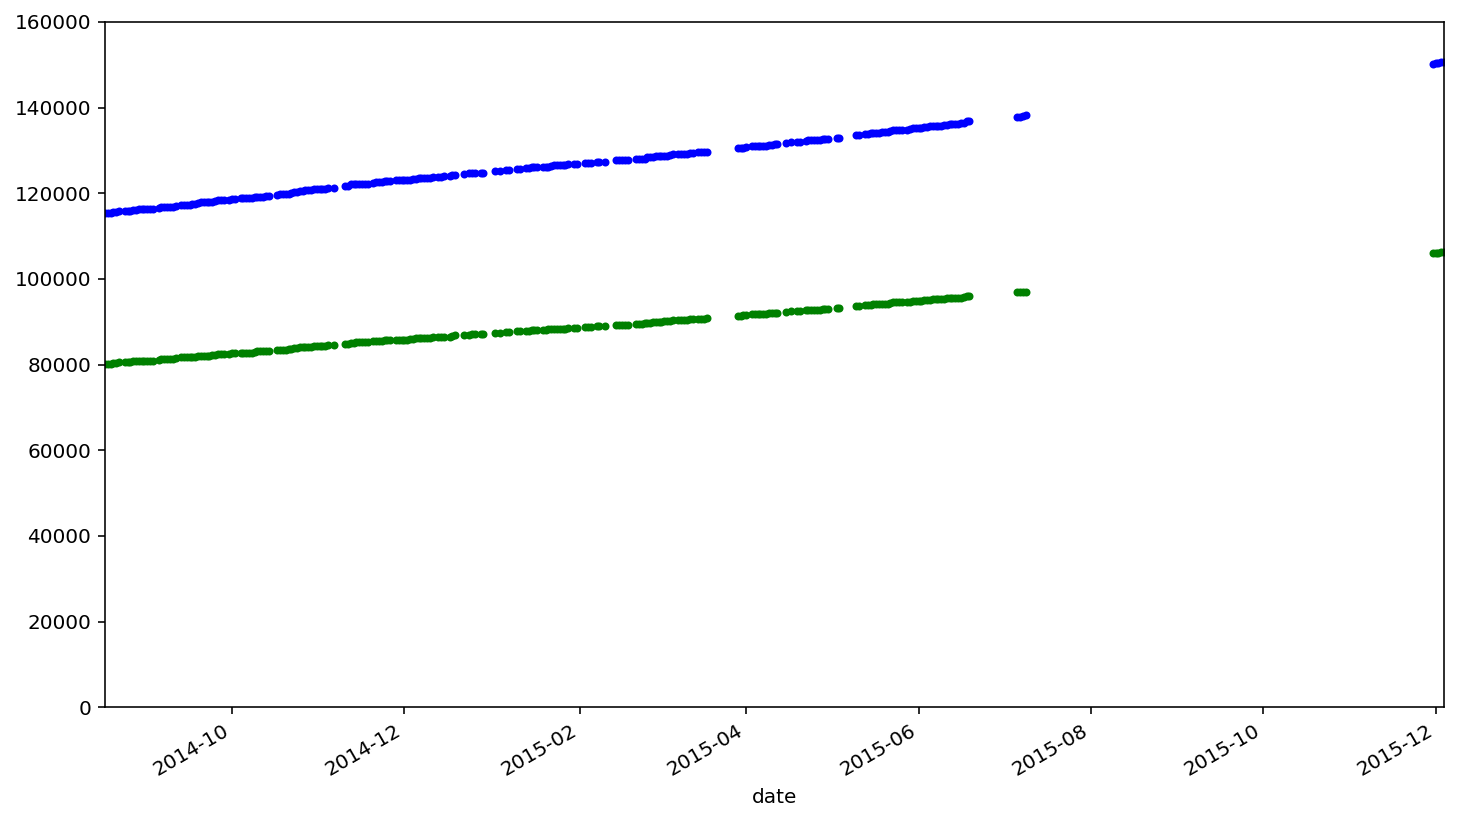

In [32]:
df['Identification.Returnable'].plot(style=".",figsize=(12,5), color="green")
df['Identification.Total'].plot(style=".",figsize=(12,7), color="blue")

plt.ylim(0,160000)

In [76]:
df

,Accessories.All.Other.Accessories,Accessories.Belt,Accessories.Gloves,Accessories.Hat,Accessories.Make.up,Accessories.Scarf,Accessories.Ties,Accessories.Umbrella,Book.Address.book,Book.Diary,...,Wallet.Purse.Purse,Wallet.Purse.Wallet,Wallet.Purse.Wristlet,date,Electronics.Activity.Tracker,Electronics.Body.Activity.Tracker,Identification.Total,Identification.Returnable,Date,DateInt
date,,,,,,,,,,,,,,,,,,,,,
2014-08-17,982,171,2680,2886,1337,1500,199,2232,560,376,...,8133,27550,1162,2014-08-17,0,0,115288,80158,2014-08-17,14082336.0
2014-08-18,982,171,2680,2886,1337,1500,199,2232,560,376,...,8133,27550,1162,2014-08-18,0,0,115288,80158,2014-08-18,14083200.0
2014-08-19,982,171,2680,2886,1337,1501,199,2234,560,376,...,8138,27573,1163,2014-08-19,0,0,115374,80221,2014-08-19,14084064.0
2014-08-20,986,171,2680,2887,1338,1501,199,2235,560,377,...,8143,27601,1164,2014-08-20,0,0,115537,80344,2014-08-20,14084928.0
2014-08-21,987,171,2680,2889,1339,1501,199,2237,560,379,...,8147,27617,1166,2014-08-21,0,0,115635,80419,2014-08-21,14085792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-30,1167,234,3182,3546,1667,1872,250,2727,666,472,...,9871,34606,1546,2015-11-30,0,19,150251,105970,2015-11-30,14488416.0
2015-12-01,1167,235,3182,3548,1668,1873,250,2727,666,472,...,9881,34629,1546,2015-12-01,0,19,150366,106057,2015-12-01,14489280.0
2015-12-02,1167,235,3182,3548,1668,1873,251,2727,666,472,...,9884,34634,1547,2015-12-02,0,19,150401,106086,2015-12-02,14490144.0


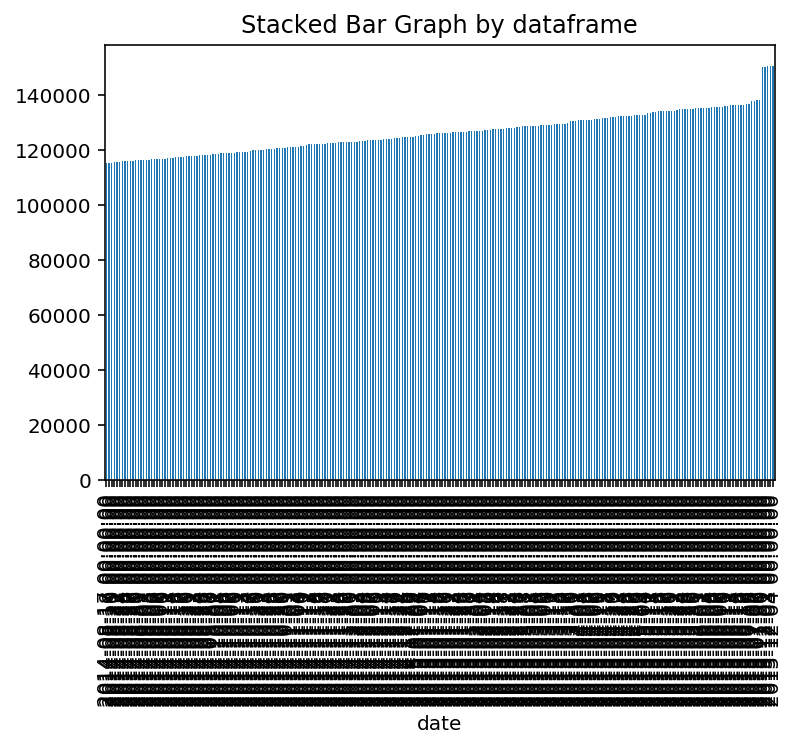

In [88]:
df['Identification.Total'].plot(x='date', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')

In [90]:
identdf = df[['Identification.AAA.Card', 'Identification.All.Other.Personal.Identification', 'Identification.Badge', 'Identification.Benefit.Card', 'Identification.Birth.Certificate', 'Identification.Credit.Card', 'Identification.Death.Certificate', 'Identification.Debit.Card', 'Identification.Drivers.License', 'Identification.Employment.ID', 'Identification.Identification.Card', 'Identification.Insurance.Card', 'Identification.Library.card', 'Identification.Membership.card', 'Identification.Military.ID', 'Identification.Passport', 'Identification.Registration.Card', 'Identification.Resident.Card', 'Identification.School.ID', 'Identification.Social.Security.Card']]
identdf

,Identification.AAA.Card,Identification.All.Other.Personal.Identification,Identification.Badge,Identification.Benefit.Card,Identification.Birth.Certificate,Identification.Credit.Card,Identification.Death.Certificate,Identification.Debit.Card,Identification.Drivers.License,Identification.Employment.ID,Identification.Identification.Card,Identification.Insurance.Card,Identification.Library.card,Identification.Membership.card,Identification.Military.ID,Identification.Passport,Identification.Registration.Card,Identification.Resident.Card,Identification.School.ID,Identification.Social.Security.Card
date,,,,,,,,,,,,,,,,,,,,
2014-08-17,493,7625,92,7548,784,11976,19,22442,11287,5166,8390,9965,4590,6739,183,1806,325,638,10593,4627
2014-08-18,493,7625,92,7548,784,11976,19,22442,11287,5166,8390,9965,4590,6739,183,1806,325,638,10593,4627
2014-08-19,493,7632,93,7554,784,11983,19,22466,11298,5171,8394,9974,4591,6743,183,1807,325,638,10598,4628
2014-08-20,493,7642,93,7562,788,12005,19,22510,11309,5177,8405,9992,4596,6753,183,1808,325,638,10607,4632
2014-08-21,493,7651,93,7571,791,12016,19,22533,11315,5181,8412,9998,4600,6756,183,1816,325,638,10610,4634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-30,641,9484,154,9690,1006,16231,21,30470,14630,6308,11175,12833,5722,8646,243,2336,380,816,13587,5878
2015-12-01,642,9488,154,9696,1006,16249,21,30496,14639,6310,11186,12844,5726,8653,243,2338,380,816,13598,5881
2015-12-02,642,9490,154,9697,1006,16259,21,30505,14644,6312,11188,12846,5726,8655,243,2338,380,816,13598,5881


In [94]:
ident = identdf.iloc[[41,93,138,177,223,247]]
ident

,Identification.AAA.Card,Identification.All.Other.Personal.Identification,Identification.Badge,Identification.Benefit.Card,Identification.Birth.Certificate,Identification.Credit.Card,Identification.Death.Certificate,Identification.Debit.Card,Identification.Drivers.License,Identification.Employment.ID,Identification.Identification.Card,Identification.Insurance.Card,Identification.Library.card,Identification.Membership.card,Identification.Military.ID,Identification.Passport,Identification.Registration.Card,Identification.Resident.Card,Identification.School.ID,Identification.Social.Security.Card
date,,,,,,,,,,,,,,,,,,,,
2014-10-01,503,7782,94,7747,814,12351,19,23246,11603,5302,8629,10230,4692,6922,188,1860,329,657,10853,4751
2014-12-01,513,7971,95,8008,845,12892,19,24292,12004,5468,8970,10565,4857,7218,197,1933,333,683,11289,4920
2015-01-31,527,8163,102,8253,878,13374,20,25175,12362,5600,9231,10874,4982,7408,205,1989,338,710,11590,5045
2015-04-01,552,8391,116,8488,906,13871,20,26103,12751,5720,9546,11205,5120,7576,210,2061,350,732,11933,5194
2015-06-01,573,8687,124,8757,934,14362,21,27034,13160,5826,9900,11604,5258,7770,220,2144,358,752,12323,5344
2015-12-01,642,9488,154,9696,1006,16249,21,30496,14639,6310,11186,12844,5726,8653,243,2338,380,816,13598,5881


In [98]:
ident.index.names=['Date']
ident

,Identification.AAA.Card,Identification.All.Other.Personal.Identification,Identification.Badge,Identification.Benefit.Card,Identification.Birth.Certificate,Identification.Credit.Card,Identification.Death.Certificate,Identification.Debit.Card,Identification.Drivers.License,Identification.Employment.ID,Identification.Identification.Card,Identification.Insurance.Card,Identification.Library.card,Identification.Membership.card,Identification.Military.ID,Identification.Passport,Identification.Registration.Card,Identification.Resident.Card,Identification.School.ID,Identification.Social.Security.Card
Date,,,,,,,,,,,,,,,,,,,,
2014-10-01,503,7782,94,7747,814,12351,19,23246,11603,5302,8629,10230,4692,6922,188,1860,329,657,10853,4751
2014-12-01,513,7971,95,8008,845,12892,19,24292,12004,5468,8970,10565,4857,7218,197,1933,333,683,11289,4920
2015-01-31,527,8163,102,8253,878,13374,20,25175,12362,5600,9231,10874,4982,7408,205,1989,338,710,11590,5045
2015-04-01,552,8391,116,8488,906,13871,20,26103,12751,5720,9546,11205,5120,7576,210,2061,350,732,11933,5194
2015-06-01,573,8687,124,8757,934,14362,21,27034,13160,5826,9900,11604,5258,7770,220,2144,358,752,12323,5344
2015-12-01,642,9488,154,9696,1006,16249,21,30496,14639,6310,11186,12844,5726,8653,243,2338,380,816,13598,5881


In [102]:
ident.reset_index()

,Date,Identification.AAA.Card,Identification.All.Other.Personal.Identification,Identification.Badge,Identification.Benefit.Card,Identification.Birth.Certificate,Identification.Credit.Card,Identification.Death.Certificate,Identification.Debit.Card,Identification.Drivers.License,...,Identification.Identification.Card,Identification.Insurance.Card,Identification.Library.card,Identification.Membership.card,Identification.Military.ID,Identification.Passport,Identification.Registration.Card,Identification.Resident.Card,Identification.School.ID,Identification.Social.Security.Card
0,2014-10-01,503,7782,94,7747,814,12351,19,23246,11603,...,8629,10230,4692,6922,188,1860,329,657,10853,4751
1,2014-12-01,513,7971,95,8008,845,12892,19,24292,12004,...,8970,10565,4857,7218,197,1933,333,683,11289,4920
2,2015-01-31,527,8163,102,8253,878,13374,20,25175,12362,...,9231,10874,4982,7408,205,1989,338,710,11590,5045
3,2015-04-01,552,8391,116,8488,906,13871,20,26103,12751,...,9546,11205,5120,7576,210,2061,350,732,11933,5194
4,2015-06-01,573,8687,124,8757,934,14362,21,27034,13160,...,9900,11604,5258,7770,220,2144,358,752,12323,5344
5,2015-12-01,642,9488,154,9696,1006,16249,21,30496,14639,...,11186,12844,5726,8653,243,2338,380,816,13598,5881


In [ ]:
x = ["2014-10-01",'2014-12-01']
y1 = ident['Identification.AAA.Card']
y2 = ident['Identification.All.Other.Personal.Identification']
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()